In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing for Linear Regression algorithm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
boston_house_df = pd.read_csv('./data/BostonHousing.csv')
boston_house_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Exploring the data ###

In [4]:
boston_house_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
boston_house_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# Checking for missing values
boston_house_df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [7]:
# Either you can remove the column 'rm' or fill with the values 
boston_house_df['rm'] = boston_house_df['rm'].fillna(boston_house_df['rm'].mean())

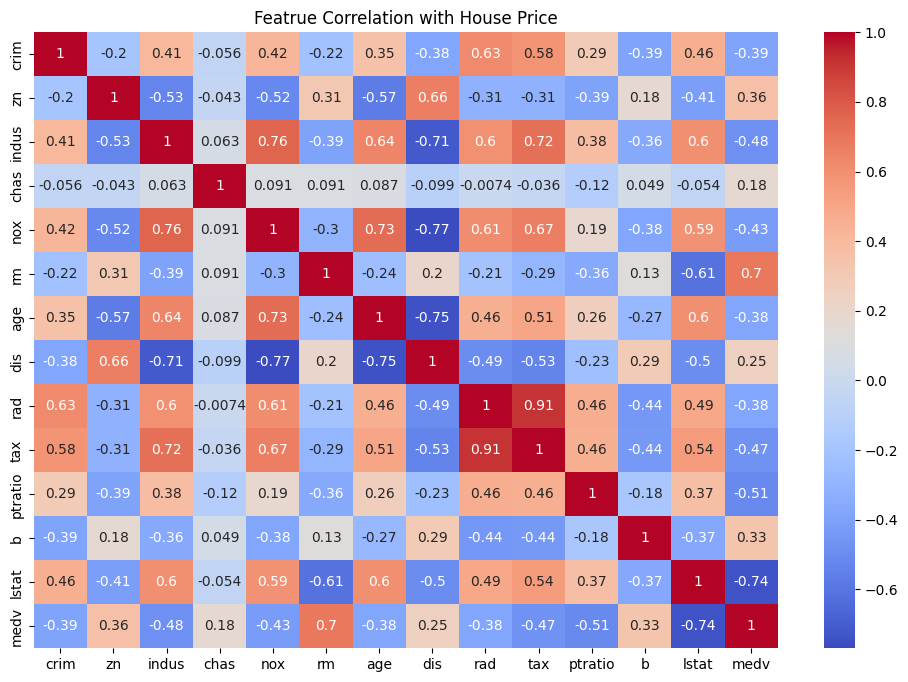

In [35]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(boston_house_df.corr(), annot=True, cmap='coolwarm')
plt.title("Featrue Correlation with House Price")
plt.show();

From the above graph we can say that
- `RM`(Avg No. of rooms) has **Strong Positive Correlation** with `PRICE` 0.7 -> more rooms, higher price
- `LSTAT` (%lower status population) has **Strong Negative Correlation** -0.74 -> more poverty, ower price
- `PTRATIO`(Pupil-teacher ration) has **Moderate Negative Correlation** -> Worse schools = lower price
- `CHAS`(Charles river dummy variable) has **Weak Positive correlation** -> slight boost if house is near river
- From the above graph
  - Positve: RM, CHAS, B -> This features we can use
  - Negative: LSTAT, PTRATIO, NOX -> This features we cannot use

It's show the **correaltion coefficient** between every **pair of feature** including the target variable `PRICE`
Correlation values range from -1 to 1:
- +1 -> Perfect positive correlation
- -1 -> perfect negative correlation
-  0  -> no linear relation


df.corr() -> calculate pearsona correlation for all pairs

annot=True -> shows the values inside each cell




### Prepare Data for training ###

In [12]:
X = boston_house_df.drop('medv', axis=1) # Include all features excluding 'medv' col
y = boston_house_df['medv'] # This is the 'col' what we want to predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- From the above we drop the coloumn `medv` because this is what we want to `predict`
- All the other columns like 'crim', 'rm', 'tax', 'lstat', etc. are the features.


### Train the Linear Regression Model ###

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)  # Training the model

#Coefficients
print("Model Coefficients:")
print(pd.Series(model.coef_, index=X.columns))

# Intercept
print("Intercepts:", model.intercept_)

Model Coefficients:
crim       -0.113051
zn          0.030209
indus       0.041726
chas        2.787586
nox       -17.188929
rm          4.429193
age        -0.006109
dis        -1.442141
rad         0.262753
tax        -0.010647
ptratio    -0.918081
b           0.012349
lstat      -0.508973
dtype: float64
Intercepts: 30.296362371791034


### Predict and Evaluate ###

In [17]:
# Predict on test data
# This model is learned to predict prices for houses it's never seen(test data)
y_pred = model.predict(X_test) 


# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-Squared (R2 Score):", r2)


Mean Squared Error (MSE): 24.404825188146216
R-Squared (R2 Score): 0.6672089705941915


From the above evalution
- MSE is 24.4 if we sq root the 24.4 ~ 4.9 on average
  - Since house prices in this dataset range from ~5 to 50, being off by ~5 is reasonable but can better
- R2 Score is 0.667 = 66.7%
  - which means our model explain `66.7%` of the variation in house prices.

### Visualize Actual VS Predicted ###

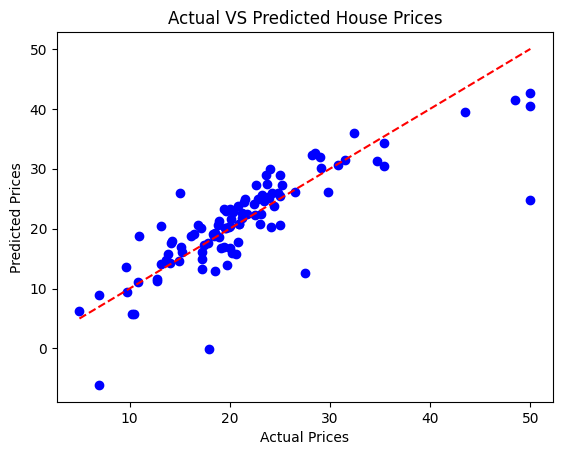

In [20]:
plt.scatter(y_test, y_pred, color="blue")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual VS Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show();

From the graph we can say that
- Blue dot on red line -> Perfect Prediction
- Blue dot above red line -> Model Predicted too high
- Blue dot below red line -> Model Predicted too low
- Dots close to line -> Good accuracy
- Dots far from line -> High error or outliers